In [ ]:
!nvidia-smi

In [ ]:
!CUDA_VISIBLE_DEVICES=6 python test_synthetic.py

In [ ]:
!CUDA_VISIBLE_DEVICES=6 python test_physionet.py

In [60]:
import transformer1d

import numpy as np
from collections import Counter
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report 

from util import read_data_generated, read_data_physionet_2, read_data_physionet_4
from transformer1d import Transformer1d, MyDataset

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


In [38]:
n_samples = 1000
n_length = 100
n_channel = 1
n_classes = 2
data, label = read_data_generated(n_samples=n_samples, n_length=n_length, n_channel=n_channel, n_classes=n_classes)
print(data.shape, Counter(label))
dataset = MyDataset(data, label)
dataloader = DataLoader(dataset, batch_size=64)

(2000, 1, 100) Counter({0: 1000, 1: 1000})


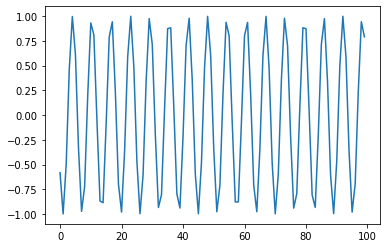

In [46]:
plt.plot(data[idx][0])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
## change the hyper-parameters for your own data
model = Transformer1d(
    n_classes=n_classes, 
    n_length=n_length, 
    d_model=n_channel, 
    nhead=8, 
    dim_feedforward=128, 
    dropout=0.1, 
    activation='relu')
model.to(device)

In [62]:
# data, label = read_data_generated(n_samples=n_samples, n_length=n_length, n_channel=n_channel, n_classes=n_classes)

window_size = 1000
X_train, X_test, Y_train, Y_test, pid_test = read_data_physionet_4(window_size=window_size)

before: 
Counter({0: 4560, 2: 2178, 1: 685, 3: 252}) Counter({0: 516, 2: 237, 1: 73, 3: 27})
after: 
Counter({2: 81419, 0: 79086, 1: 72521, 3: 63018}) Counter({0: 9052, 2: 8537, 3: 7508, 1: 7374})


In [65]:
idx=6
X_train[idx].shape

(1, 1000)

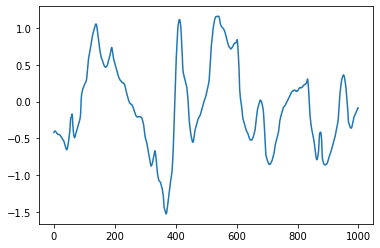

In [66]:
plt.plot(X_train[idx][0])

In [59]:
for idx in range(len(data)):
    print(data[idx].shape, label[idx])

(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 0
(1, 100) 1
(1, 100) 1
(1, 100) 1

1

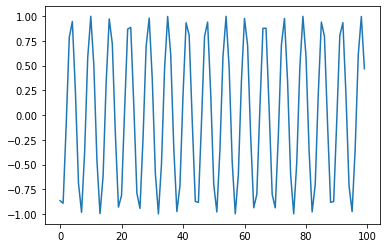

In [56]:
idx = 9
plt.plot(data[idx][0])
label[idx]

In [ ]:
data[0].shape